# Modelos de entranamiento

En este cuaderno se expondrá algunos modelos, como se realiza su entrenamiento y nociones basicas de machine learning, esto con el fin de saber seleccionar un modelo adecuado para cada situación, además de que conocer sobre dichos modelos ayuda a solucionar problemas que puedan presentarse durante el entrenamiento.

Muchos de estos modelos se encuentran implementados en **scklearn**, por lo que cuando se busque realiar un modelo no es necesario implementar desde cero los modelos


# Regresión lineal

Este modelo del machine learning realiza prediciones simplemente mediante el producto punto del vector de los pesos($\overrightarrow{\theta}$) por los atributos($\overrightarrow{x}$) así como se muestra en la siguiente ecuación

$$ \hat{y} = \theta_0 + \theta_1 x_1 + ... + \theta_{n-1} x_{n-1} + \theta_n x_n $$

- $\hat{y}$ es la predicción.
- $n$ es el numero de atributos.
- $x_i$ es el i-enesimo atributo.
- $\theta_i$ es el i-enesimo peso donde $\theta_0$ es el termino constante, y los demas son los pesos de cada atributo, es decir, que tanto aporta a nuestra predicción dicho atributo.

Todos los modelos de machine learning utilizan funciones conocidas como **funciones de costo** que indican que tan bien o mal está realizando su trabajo el modelo, que dependiendo del tipo de modelo existen varias funciones de costo que pueden utilizarse para este fin, especificamente en regresión lineal se utiliza el **MAE**, el **RMSE** y el **MSE**, aunque debido a que ambas llevan al mismo resultado se prefiere el MSE, ya que resulta más fácil de *minimizar*.

$$MSE(\theta)=\frac{1}{m}\sum_{i=1}^{m}(\theta x^{(i)}-y^{(i)})^{2}$$

el vector $x^{(i)}$ se ve de la siguiente manera, sin embargo hay que considerar que no necesariamente debe tener 4 entradas

$$ x^{(i)} = \; 
\begin{bmatrix}
      -118.23 \\
      33.91 \\
      1.31 \\
      38.37
\end{bmatrix} 
$$

**Nota:** Con minimizar se refiere a obtener el menor valor posible de dicha función, o desde la vista del calculo encontrar el minimo de la función.

# Ecuación normal

Algunos algoritmos de machine learning cuentan con ecuaciones las cuales permiten encontrar el valor de $\theta$ que minimiza la funcion de costo y da el resultado de manera directa, en el caso de regresión lineal esta ecuación se conoce como **ecuación normal**

$$\hat{\theta} = (X^{T} X) X^{T} y $$

A continuación se muestra su implementación en python, en este caso se crearon datos lineales aleatorios, sin embargo en los problemas de la vida real no todos los sistemas podrán ser estudiados mediante modelos lineales, si se tienen dudas sobre que la relación de los datos sean lineales, se puede utilizr el coeficiente de correlación de **Bravais-Person**, o en caso de no ser lineal, pero se desea saber si ambas variables tienen alguna relación el coeficiente de **Spearman**

In [27]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

X = 2*np.random.rand(100,1)
y = 4 + 3*X +np.random.rand(100,1)

100

Primero se crearon algunos dato lineales con algo de ruido, y en la siguiente celda se realizo un grafico de dichos datos

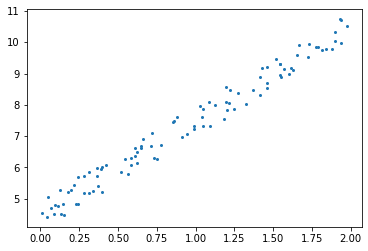

In [2]:
plt.scatter(X,y,s=4)
plt.show()

Antes de utilzar la ecuación se necesita agregar una columna de unos del mismo largo de instacncias en X, esto se realizar en la primera línea de codigo del siguiente bloque, esto es así ya que esta ecuación proviene del problema de minimos cuadrados, donde se tienen ecuaciones del siguiente estilo

$$  y = \theta_0 + \theta_1 x_1  $$

Utilizando los valores de $y$ y $x$, provenientes del vector de soluciones y de atributos respectivamente. Por ejemplo digamos que tenemos un atributo y 3 instancias, siendo las instancias de la forma  $(x,y)$ estas son $(1,5)$, $(2,3)$,$(3,7)$, entonces se obtienen las siguientes 3 ecuaciones  

$$ \theta_0 + \theta_1 = 5   $$
$$ \theta_0 + 2\theta_1 = 3   $$
$$ \theta_0 + 3\theta_1 = 7  $$

Si observamos detenidamente los valores que multiplican a $\theta_0$ son 1 para todos los casos, por lo que como se menciono se debe agregar como se hace en la primer linea, para que pueda funcionar correctamente el algoritmo

In [3]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

#### Valores que minimizan la función de costo

Los valores del $\vec{\theta}$ se encuentran ordenados de manera ascendente así como se muestra a continuación

$$ \theta = \; 
\begin{bmatrix}
      \theta_0 \\
      \theta_1 
\end{bmatrix} 
$$


In [4]:
theta0 = theta_best[0,0]
theta1 = theta_best[1,0]
theta0,theta1

(4.513597656401037, 2.9832341780601856)

En la siguiente celda se realizan predicciones con el modelo entrenado, existen dos formas de hacer predicciones

1. Escribiendo la ecuación con los valores de $\vec{\theta}$, aunque está opción resulta menos viable si el $\vec{\theta}$ tiene gran extension

In [5]:
X_new = np.array([[0],[2]])
y_preds_f = theta0 + theta1*X_new
y_preds_f

array([[ 4.51359766],
       [10.48006601]])

2. Agregando una columna de 1s a los valores que se quieren predecir y realizar producto punto entre el vector $\vec{x}$ y $\vec{\theta}$

In [6]:
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.51359766],
       [10.48006601]])

Con el modelo entrenado, podemos graficar las predicciones hechas por el mismo y observar si es un buen modelo

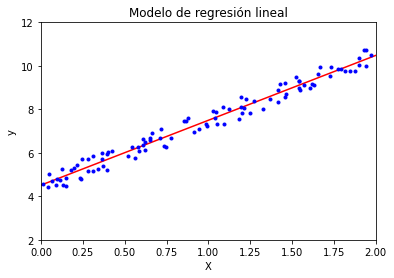

In [7]:
plt.plot(X_new,y_predict,"r-")
plt.plot(X,y,"b.")
plt.title("Modelo de regresión lineal")
plt.axis([0,2,2,12])
plt.xlabel("X")
plt.ylabel("y")
plt.show()

# Implementación con sklearn

Como se menciono sklearn es una libreria que tiene varios modelos y herramientas para machine learning, que resultan bastante simples de utilizar, para ello se debe importar el modelo y crear el objeto modelo, como se hace en la siguiente celda.

LinearRegression utiliza otra ecuación para resolver el mismo problema, el cual se describe en la siguiente ecuación

$$\hat{\theta} = X^+ y$$

Donde X^+ se conoce como la pseudoinversa de X o la inversa de **Moore-Penrose** que por lo general es más eficiente que utilizar la ecuación normal directamente.

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

Una vez creado el objeto modelo, se utiliza el metodo *fit()* para entrenar al mismo, *predict()* para realizar predicciones.

In [9]:
lin_reg.fit(X,y)
lin_reg.predict(X_new)

array([[ 4.51359766],
       [10.48006601]])

Una de las desventajas de estos modelos es que tanto la ecuación normal como la pseudoinversa de Moore-Penrose es que ambos algoritmos se vuelven bastante lentos al aumentar el numero de atributos

# Gradiente descendiente

Es un algoritmo iterativo de optimización el cual es ampliamente utilizado, este se basa en que el $\vec{\theta}$ se inicializa en valores aleatorios, estos se iran modificando gradualemente de manera que decresca progresivamente el valor de la función de costo, hasta que llegue a su minimo global o uno local, el hyperparametro relacionado con este algoritmo es $\eta$ conocido como radio de aprendizaje, el cual determina que tan rapido converge hacia dicho minimo, no obstante selecionar valores grandes de $\eta$ puede hacer que nunca converga hacia dicho minimo, por lo que debe buscarse un valor optimo para cada problema y modelo.

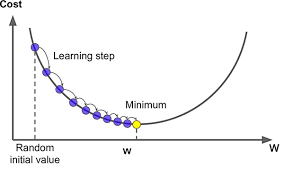

Como se menciono no todas las funciones de costo tienen solo un minimo, existe minimos locales y globales, por lo que puede que nuestro algotimo converga a alguno de ellos, en el caso de regresión lineal solo hay un minimo y es global.

<img  src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Extrema_example_es.svg/1200px-Extrema_example_es.svg.png" />

## Gradiente descendiente batch

Para calcular el siguiente valor del $\vec{\theta}$ es necesario tener el gradiente de la función de costo, el cual nos indica que tanto cambiaría dicha función si cambiamos los valores de $\vec{\theta}$ ligeramente

$$\frac{\partial}{\partial \theta_j} MSE(\theta)=\frac{2}{m}\sum_{i=1}^{m}(\theta x^{(i)}-y^{(i)})x^{(i)}_j $$

El vector gradiente $\nabla_{\theta} MSE(\theta)$ contiene todas las derivadas parciales de la función de costo

$$ \nabla_{\theta} MSE(\theta) = \frac{2}{m} X^{T}(X\theta - y) $$

Para modificar el valor de $\vec{\theta}$ se utiliza la siguiente ecuación

$$ \theta^{(nuevo)} = \theta - \eta\nabla_{\theta} MSE(\theta)$$

A continuación su implementación con varios valores de $\eta$

0
MSE: 13.542437324978017
Valores de theta: 

[[2.50421604]
 [1.3558787 ]] 

400
MSE: 0.0849565525659688
Valores de theta: 

[[4.51359733]
 [2.98323446]] 

800
MSE: 0.08495655256593737
Valores de theta: 

[[4.51359766]
 [2.98323418]] 



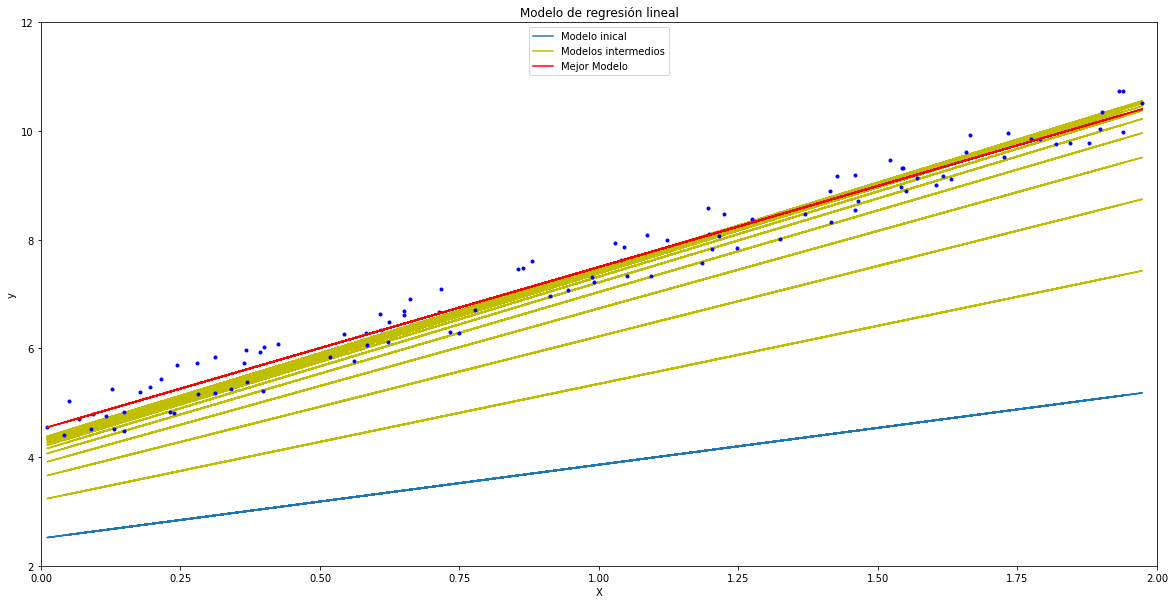

In [111]:
from sklearn.metrics import mean_squared_error

eta = 0.1 #learning rate
n_iteration = 1000
m = 100

theta = np.random.randn(2,1)

y_preds_plot = []

for iteration in range(n_iteration):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta*gradients
    
    X_new = np.c_[np.ones((len(X),1)),X]
    y_predicts = X_new.dot(theta)
    y_preds_plot.append(y_predicts)
    
    if iteration % 400 == 0:
        print(iteration)
        print(f"MSE: {mean_squared_error(y,y_predicts)}")
        print(f"Valores de theta: \n")
        print(f"{theta} \n")

plt.figure(figsize=(20,10))
for i in range(0,20):
    if i == 0:
        plt.plot(X,y_preds_plot[i],label="Modelo inical")
    else:
        if i == 19:
            plt.plot(X,y_preds_plot[i],"y-",label="Modelos intermedios")
        else:
            plt.plot(X,y_preds_plot[i],"y-")
plt.plot(X,y,"b.")
plt.plot(X,y_preds_plot[200],"r-",label="Mejor Modelo")
leg = plt.legend(loc='upper center')
plt.title("Modelo de regresión lineal")
plt.axis([0,2,2,12])
plt.xlabel("X")
plt.ylabel("y")
plt.show()     


0
MSE: 3.15226956669253
Valores de theta: 

[[4.72426917]
 [4.39567725]] 

400
MSE: 0.08495655256593737
Valores de theta: 

[[4.51359766]
 [2.98323418]] 

800
MSE: 0.08495655256593737
Valores de theta: 

[[4.51359766]
 [2.98323418]] 



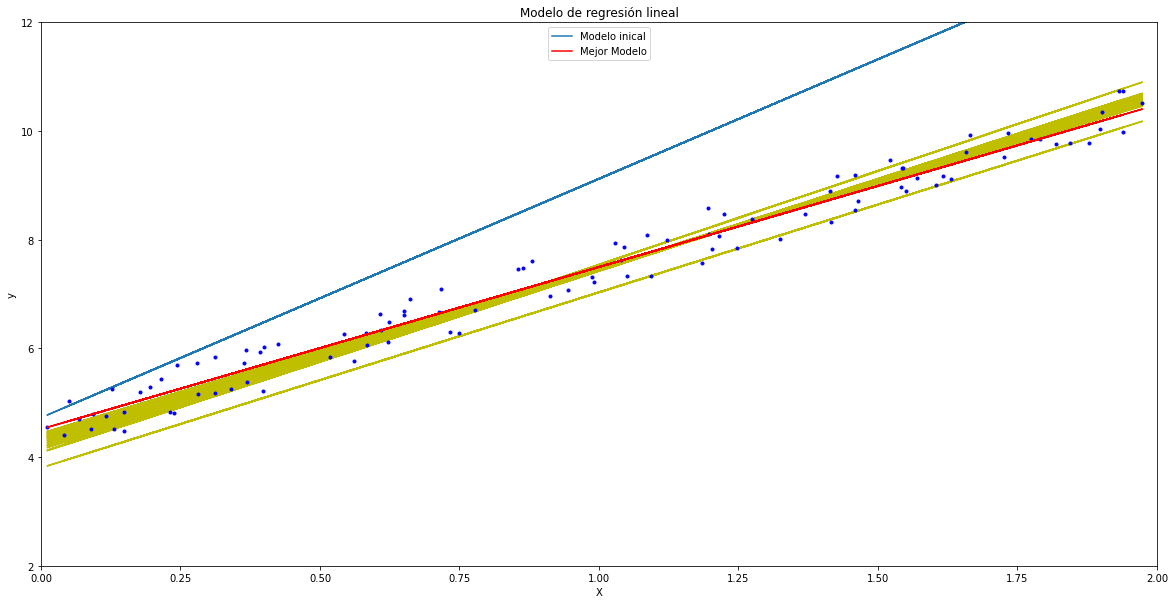

In [108]:
from sklearn.metrics import mean_squared_error

eta = 0.3 #learning rate
n_iteration = 1000
m = 100

theta = np.random.randn(2,1)

y_preds_plot = []

for iteration in range(n_iteration):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta*gradients
    
    X_new = np.c_[np.ones((len(X),1)),X]
    y_predicts = X_new.dot(theta)
    y_preds_plot.append(y_predicts)
    
    if iteration % 400 == 0:
        print(iteration)
        print(f"MSE: {mean_squared_error(y,y_predicts)}")
        print(f"Valores de theta: \n")
        print(f"{theta} \n")

plt.figure(figsize=(20,10))
for i in range(0,20):
    if i == 0:
        plt.plot(X,y_preds_plot[i],label="Modelo inical")
    else:
        if i == 19:
            plt.plot(X,y_preds_plot[i],"y-",label="Modelos intermedios")
        else:
            plt.plot(X,y_preds_plot[i],"y-")
plt.plot(X,y,"b.")
plt.plot(X,y_preds_plot[200],"r-",label="Mejor Modelo")
leg = plt.legend(loc='upper center')
plt.title("Modelo de regresión lineal")
plt.axis([0,2,2,12])
plt.xlabel("X")
plt.ylabel("y")
plt.show()         


0
MSE: 58.814567474576606
Valores de theta: 

[[7.61067909]
 [7.35948012]] 

400
MSE: 4.540819157655166e+23
Valores de theta: 

[[3.10368613e+11]
 [3.51514971e+11]] 

800
MSE: 3.514198203831675e+45
Valores de theta: 

[[2.73038455e+22]
 [3.09235859e+22]] 



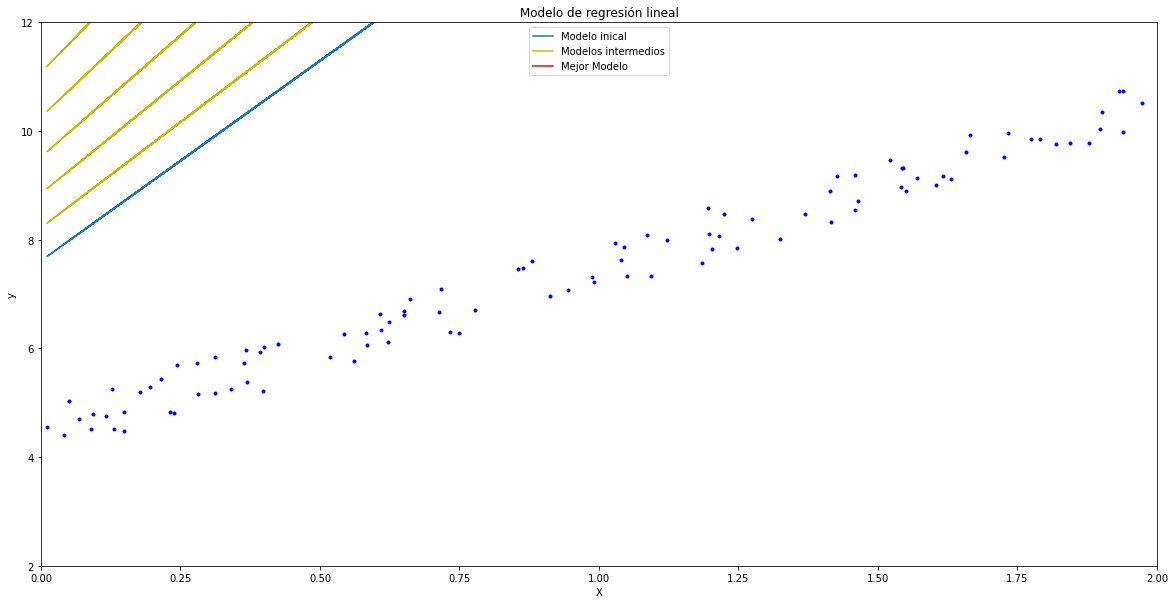

In [112]:
from sklearn.metrics import mean_squared_error

eta = 0.5 #learning rate
n_iteration = 1000
m = 100

theta = np.random.randn(2,1)

y_preds_plot = []

for iteration in range(n_iteration):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta*gradients
    
    X_new = np.c_[np.ones((len(X),1)),X]
    y_predicts = X_new.dot(theta)
    y_preds_plot.append(y_predicts)
    
    if iteration % 400 == 0:
        print(iteration)
        print(f"MSE: {mean_squared_error(y,y_predicts)}")
        print(f"Valores de theta: \n")
        print(f"{theta} \n")

plt.figure(figsize=(20,10))
for i in range(0,20):
    if i == 0:
        plt.plot(X,y_preds_plot[i],label="Modelo inical")
    else:
        if i == 19:
            plt.plot(X,y_preds_plot[i],"y-",label="Modelos intermedios")
        else:
            plt.plot(X,y_preds_plot[i],"y-")
plt.plot(X,y,"b.")
plt.plot(X,y_preds_plot[200],"r-",label="Mejor Modelo")
leg = plt.legend(loc='upper center')
plt.title("Modelo de regresión lineal")
plt.axis([0,2,2,12])
plt.xlabel("X")
plt.ylabel("y")
plt.show()     

En las celdas anteriores se entrenaron 3 modelos con diferentes diferentes radios de aprendizaje, como se observo, los modelos con $\eta = 0.1 $ y $\eta = 0.3 $ convergen a un modelo que realiza buenas prediciones, sin embargo aquel con el $\eta = 0.5 $ jamas converge a la solución optima, por ello es importante seleccionar un $\eta$ apropiado